In [1]:
from manipulation_library_dev import plot_compare_mapped_image_save, get_image, get_colors, OcrAnalysis 
import easyocr
import ssl
from manipulation_library import show_box
import matplotlib.pyplot as plt
import numpy as np
import os
from glob import glob
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
reader = easyocr.Reader(['en'],gpu=True) # this needs to run only once to load the model into memory

1st example show the bounding boxes on the image on the text 

In [3]:
image = "/home/barradd/Documents/GitHub/Coral_project/output/Test-enhanced-Images/Enhanced_images/up/T1_CTRL_DAY-6-up.jpeg"

In [4]:
result = reader.readtext(image)
bboxes = []
for (bbox, text, prob) in result:
    (top_l, top_r, bottom_r, bottom_l) = bbox
    box = np.array( [int(top_l[0]) ,int(top_l[1]) , int(bottom_r[0]) ,int(bottom_r[1])] )
    bboxes.append(box)

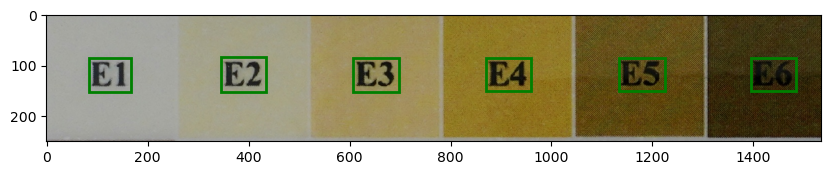

In [5]:
image = get_image(image)
plt.figure(figsize=(10, 5))
plt.imshow(image)
for input_box in bboxes : 
    show_box(input_box, plt.gca())
plt.axis('on')
plt.show()

2nd Gather all the cropped parts from the images 

In [6]:
path_to_folder = "/".join(os.getcwd().split("/")[:-1])

segment_enhanced = "output/Test-enhanced-Images/Enhanced_images/cropped_images"
path_absolute_to_image = os.path.join(path_to_folder,segment_enhanced)
segment_center_images = f"{path_absolute_to_image}/*_1.jpg"
list_of_center_segment_images_enhanced = glob(segment_center_images)

file_name = [ x.split("/")[-1].split("-center")[0] for x in list_of_center_segment_images_enhanced ]

my_path = "output/Test-enhanced-Images/Enhanced_images"
path_to_images_folder = os.path.join(path_to_folder,my_path)
section = ["up","down","rigth","left"]
my_images ={}
for f_name in file_name:
    inner_dict = {} 
    for sec in section :
        image_path = os.path.join(path_to_images_folder, sec, f"{f_name}-{sec}.jpeg")
        if os.path.isfile( image_path): 
            inner_dict[sec] = image_path
        else : 
            print (f"file not found :{path_to_images_folder}/{sec}/{f_name}-{sec}.jpeg")
    if inner_dict :
         my_images[f_name] = inner_dict



Build the color chart 

In [7]:
my_images["T1_CTRL_DAY-6"]["up"]

'/home/barradd/Documents/GitHub/Coral_project/output/Test-enhanced-Images/Enhanced_images/up/T1_CTRL_DAY-6-up.jpeg'

In [8]:
custom_color_charts = {}
for f_name in file_name:
        my_personal_chart = {}

        for sec in section :
            im =  my_images[f_name][sec]
            result = reader.readtext(im)
            bboxes, text_list = OcrAnalysis.get_bounding_boxes(result)

            image = get_image(im)

            for t,bbox in zip(text_list,bboxes):
                cropped_image = OcrAnalysis.get_pixels_above_bbox(bbox=bbox,image=image)
                df_color = get_colors(image=cropped_image, number_of_colors=1, show_chart=False)
                my_personal_chart[t]=tuple( round(x) for x in df_color["rgb_colors"][0].tolist() )

        if my_personal_chart:
            my_personal_chart["Black"] = tuple([0,0,0])
            my_personal_chart["White"] = tuple([255,255,255])
            new_keys = ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'Black', 'White']

            my_personal_chart = {new_keys[i]: my_personal_chart[old_key] for i, old_key in enumerate(my_personal_chart)}
            custom_color_charts[f_name] = my_personal_chart


In [9]:
# custom_color_charts

Show the text detected

In [10]:
custom_color_charts["T1_CTRL_DAY-2"].keys()

dict_keys(['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'Black', 'White'])

Show the custom color chart 

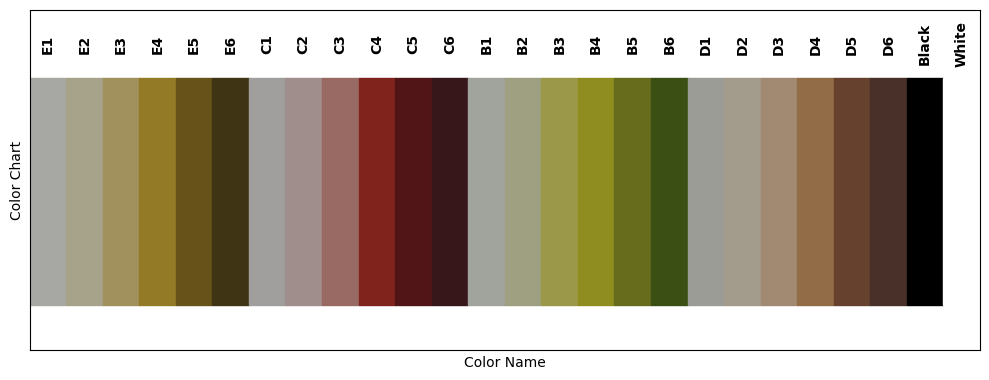

In [11]:
OcrAnalysis.plot_custom_colorchart(custom_color_charts["T0_CTRL_DAY-2"])

run the code such as you get all the images to match their custom color chart in the loop

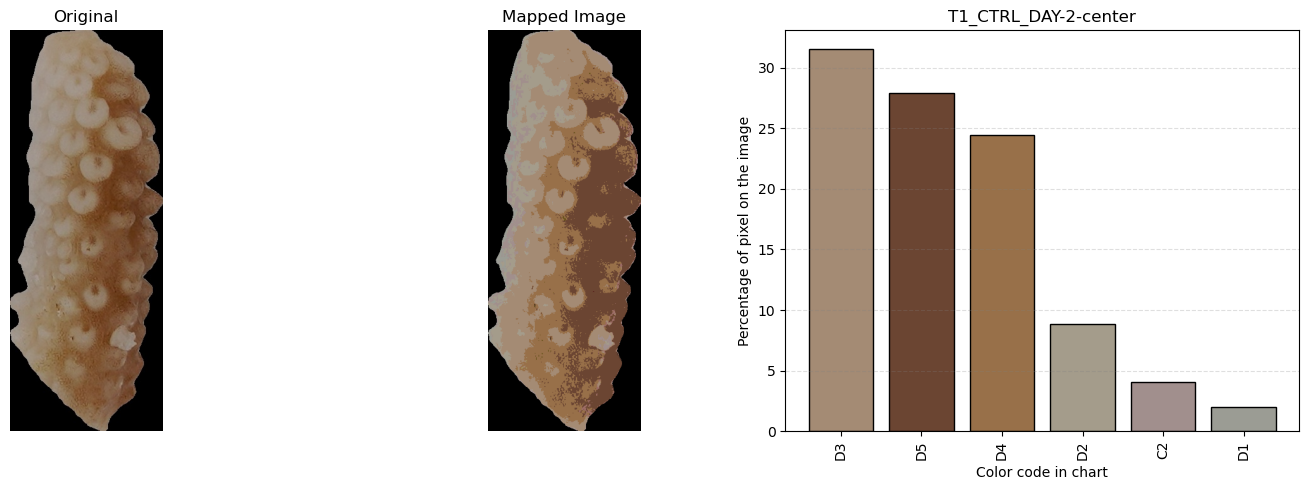

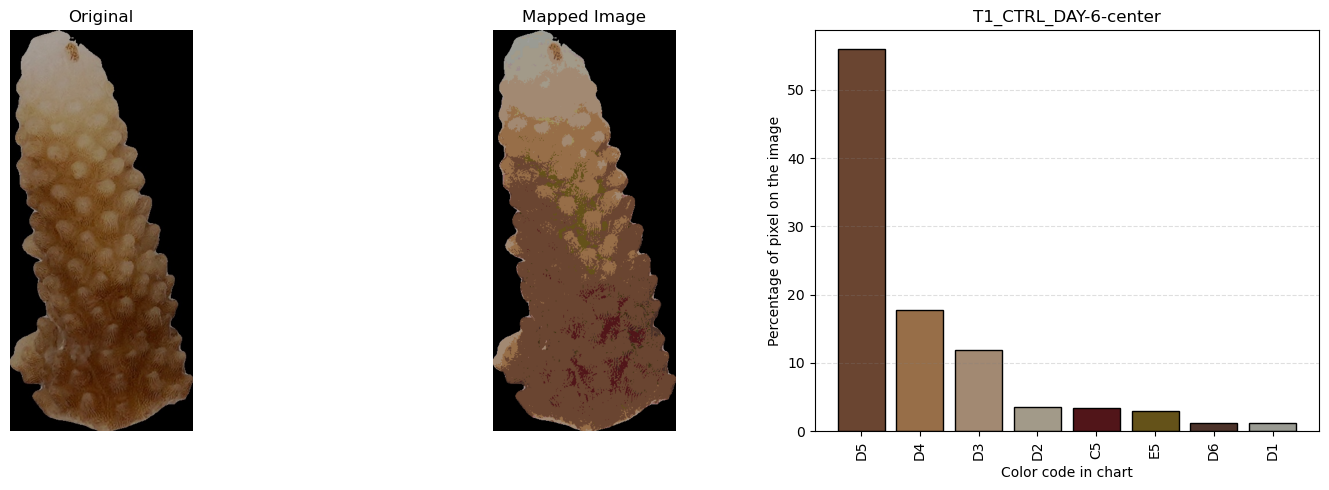

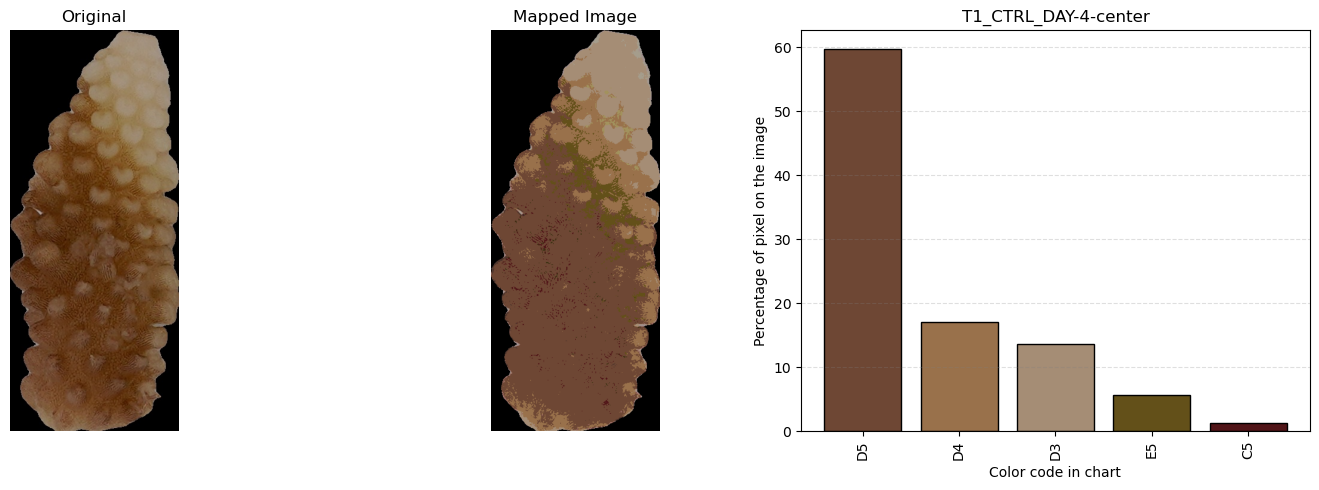

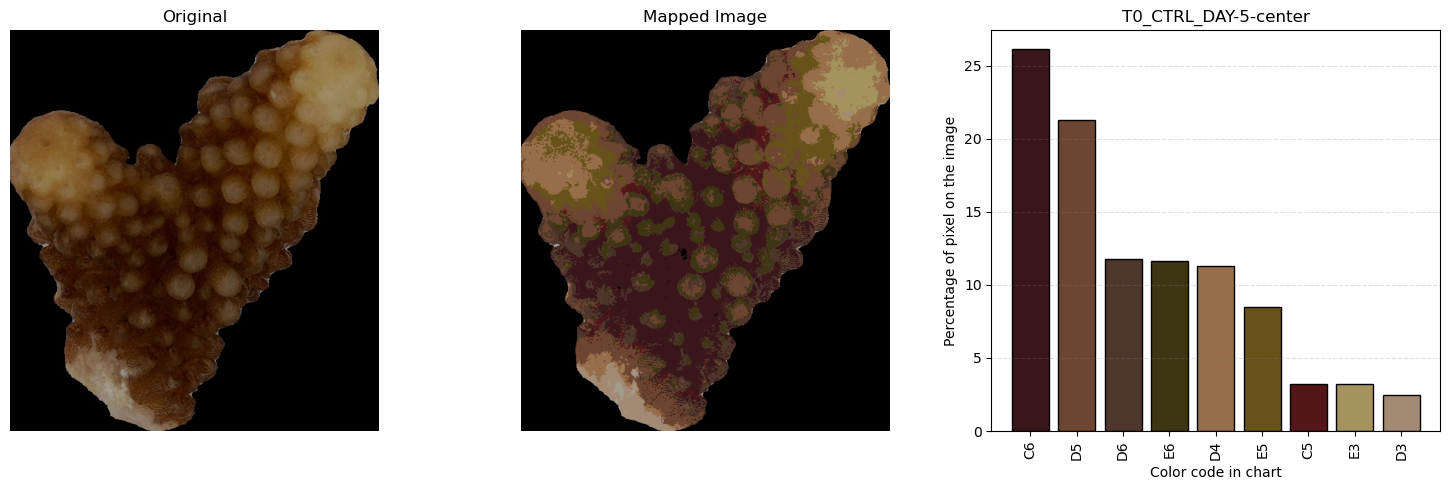

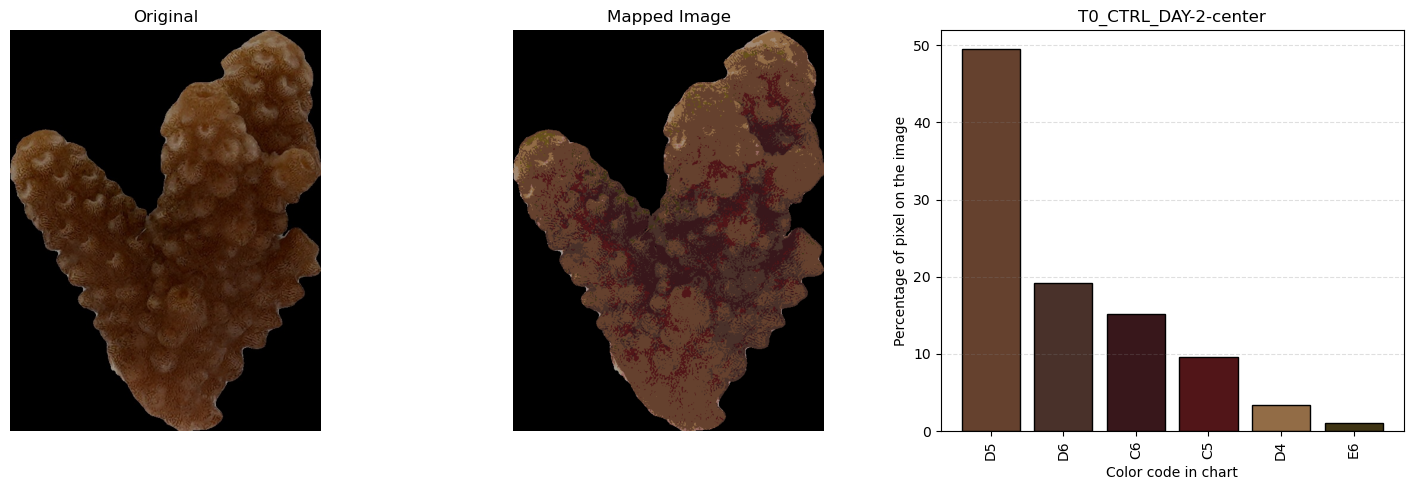

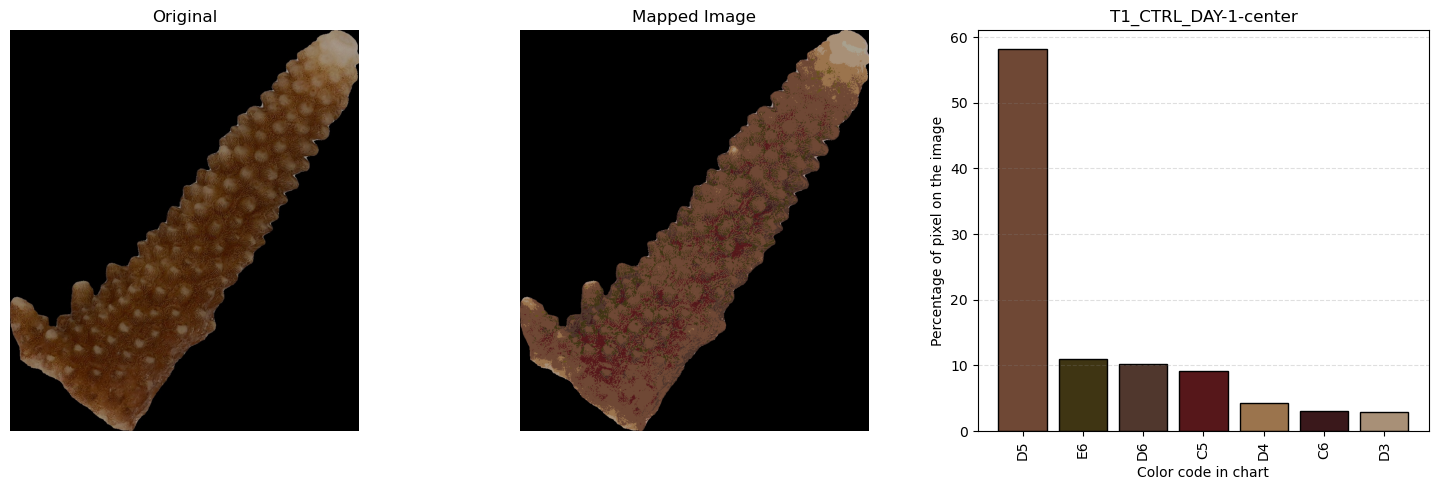

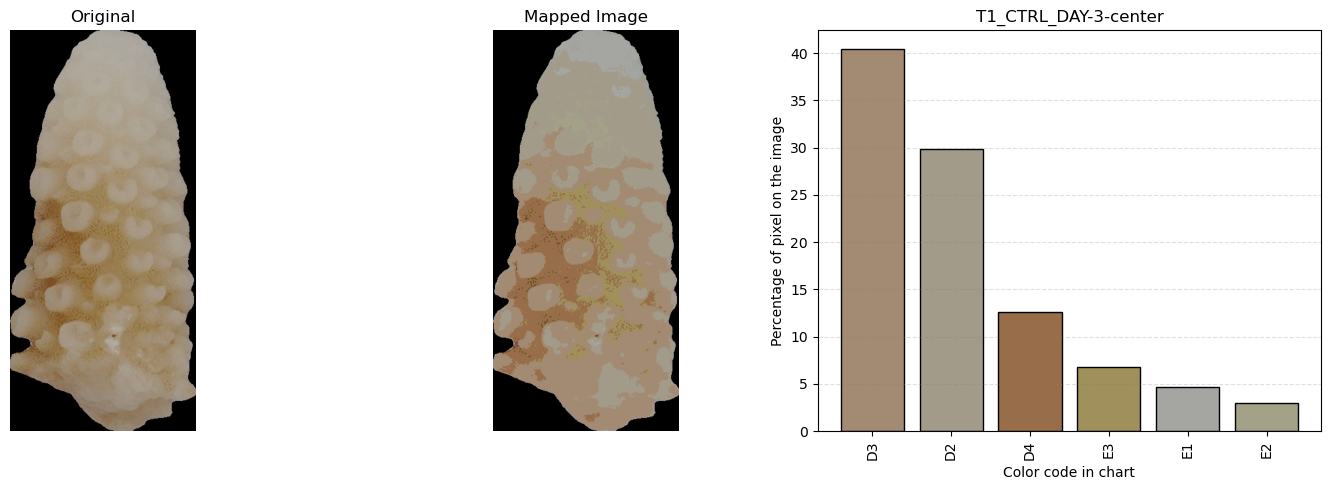

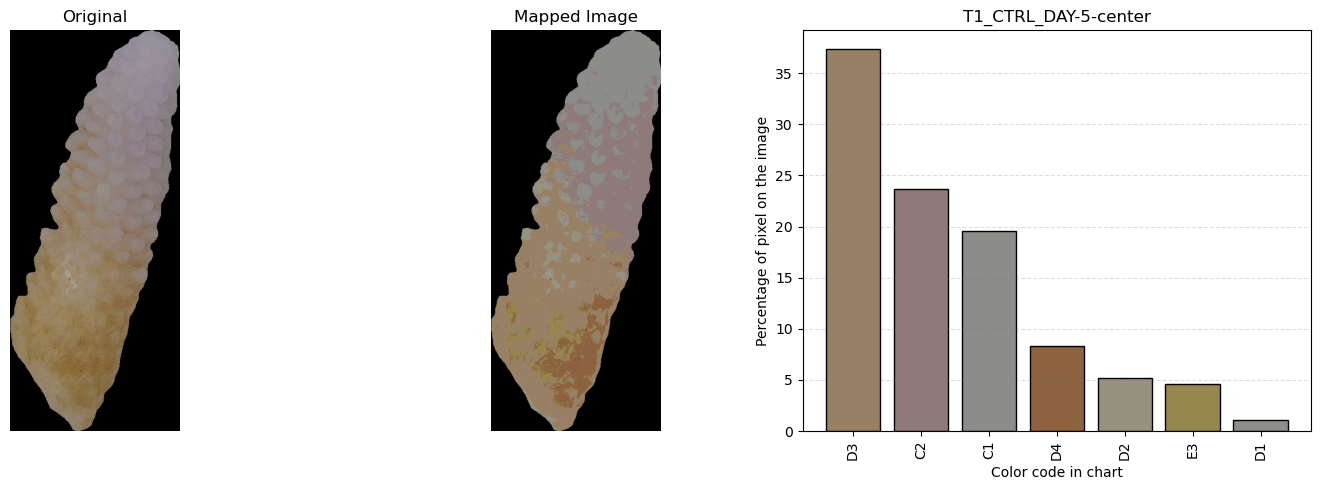

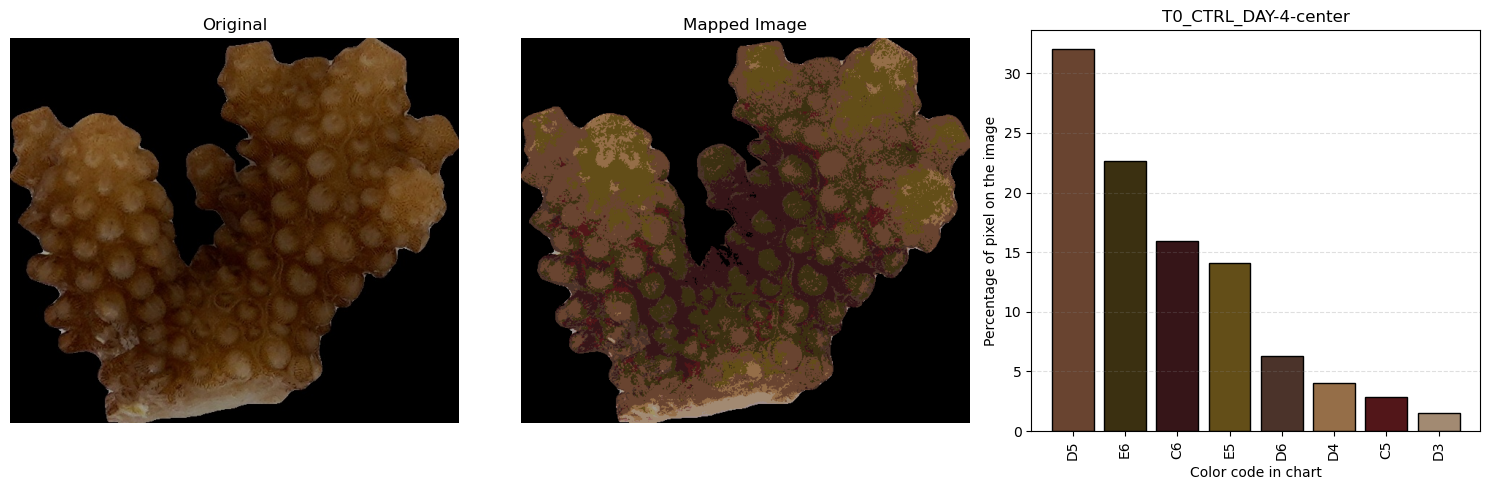

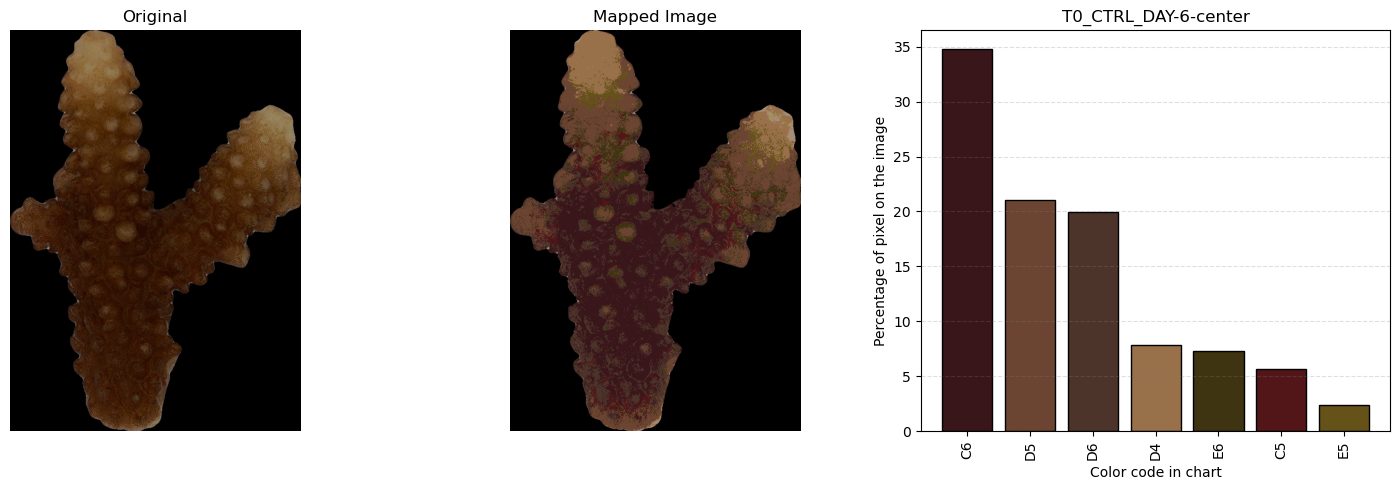

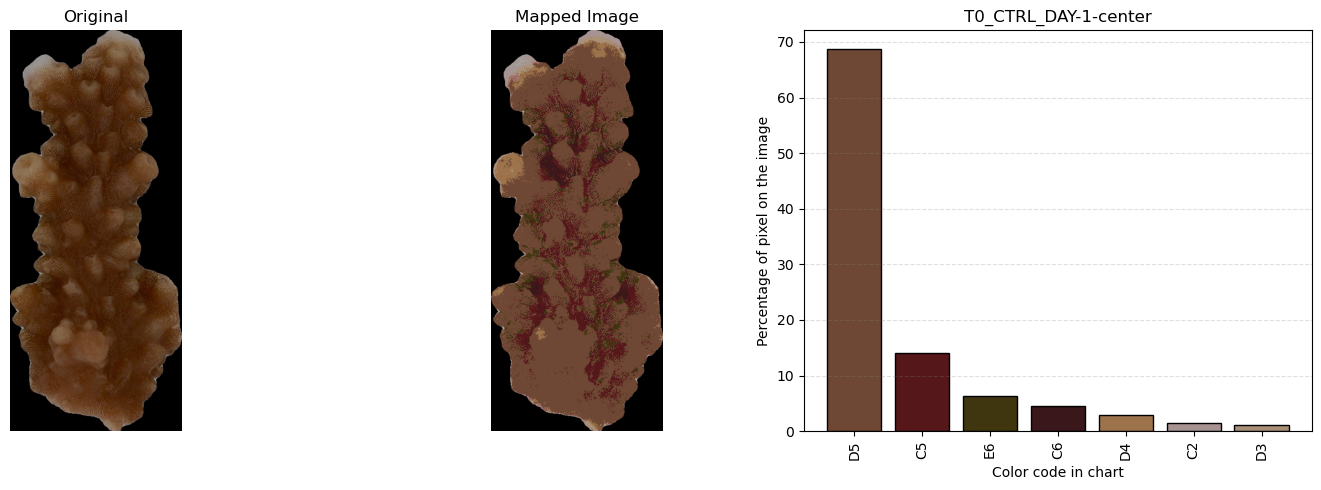

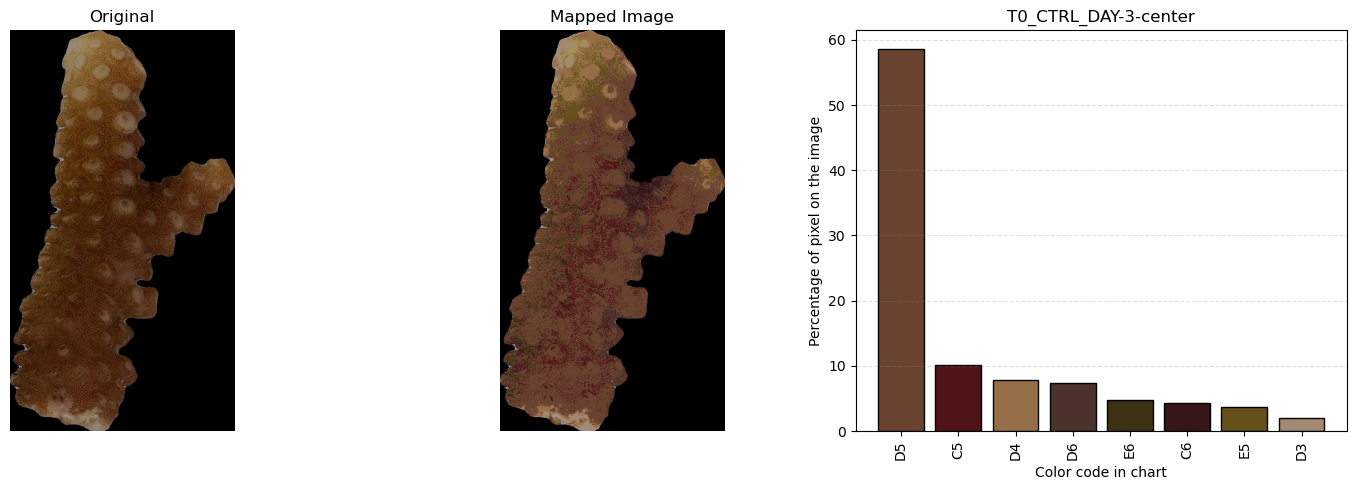

In [12]:
outputs = "output/Test-enhanced-Images/Enhanced_images/mapped_color_images"
path_absolute_to_output = os.path.join(path_to_folder,outputs)
os.makedirs(path_absolute_to_output ,exist_ok=True)
# print (path_absolute_to_output)

for im in list_of_center_segment_images_enhanced: 
    local_image = get_image(im)
    name = im.split("/")[-1]
    key = im.split("/")[-1].split("-center")[0]
    path_name = os.path.join(path_absolute_to_output,name)
    # print (path_name)
    plot_compare_mapped_image_save( local_image,path_name,custom_color_charts[key])